# Algoritmo Evolutivo Completo com DEAP, Rastrigin, Elitismo Simples e Classe Personalizada

Objetivo:

Criar um algoritmo evolutivo completo em Python usando a biblioteca DEAP para otimizar a função de Rastrigin, utilizando a classe personalizada MeuIndividuo e atendendo aos seguintes requisitos:

    Geração de Indivíduos:
        Genes em um array de 10 posições.
        Nomes aleatórios usando Faker.
    Plotagem de Gráfico:
        Aptidão (melhor e média) por geração.
    Parâmetros:
        População de 100 indivíduos.
        90% de chance de crossover.
        5% de chance de mutação.
        10 gerações.
    Elitismo Simples:
        Preservação do melhor indivíduo entre gerações.

/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



--------- Generation 1 ---------

Dados da geração 1 : {'avg': 188.61451773209973, 'min': 132.4752105097857, 'max': 253.33887904474332}
[[2.0919573542782253, 1.0703228901335935, 2.203969123836673, 2.6085111651787347, -0.2541286274603136, 0.11348801714068912, -0.19922169954792768, 1.6958844105659745, 1.302657672426319, 0.46577453057595175]]
[-0.07, -3.3, -3.4, 0.52, -0.92, -3.92, 1.56, -1.27, 0.09, 3.93]

Best individual: Scott Cortez, Genes: [-0.07, -3.3, -3.4, 0.52, -0.92, -3.92, 1.56, -1.27, 0.09, 3.93],Fitness: 115.49913605926196, SumEvaluate: -6.779999999999999

--------- Generation 2 ---------

Dados da geração 2 : {'avg': 160.3277879032517, 'min': 115.49913605926196, 'max': 195.38920882431793}
[[2.0919573542782253, 1.0703228901335935, 2.203969123836673, 0.6118685282133445, 2.3084531869908833, -2.8068803701625047, -0.19922169954792768, -1.261359308784412, -0.10666301235781184, 0.46577453057595175]]
[-0.07, -3.3, -3.4, 0.52, -0.92, -3.92, 1.56, -1.27, 0.09, 3.93]

Best individual:

,Generation,Best,Mean,Minimum,Maximum
0,1.0,253.338879,188.614518,132.475211,253.338879
1,2.0,195.389209,160.327788,115.499136,195.389209
2,3.0,186.806693,150.246955,112.783147,186.806693
3,4.0,173.277740,130.115556,98.558997,173.277740
4,5.0,128.568291,109.299228,94.796691,128.568291
...,...,...,...,...,...
95,96.0,28.667945,28.667945,28.667945,28.667945
96,97.0,28.667945,28.667945,28.667945,28.667945
97,98.0,40.205802,29.244838,28.667945,40.205802
98,99.0,49.538903,29.766466,28.667945,49.538903


/tmp/ipykernel_7002/1041221607.py:244: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  best_population_df = pd.read_json(


,Generation,Nome,Fitness,FitnessRastrigin,FitnessSum
0,1,Scott Cortez,115.499136,146.02423,-6.78
1,2,Scott Cortez,112.783147,146.02423,-6.78
2,3,Scott Cortez,98.558997,146.02423,-6.78
3,4,Scott Cortez,94.796691,146.02423,-6.78
4,5,Scott Cortez,94.796691,146.02423,-6.78
...,...,...,...,...,...
95,96,Scott Cortez,28.667945,146.02423,-6.78
96,97,Scott Cortez,28.667945,146.02423,-6.78
97,98,Scott Cortez,28.667945,146.02423,-6.78
98,99,Scott Cortez,28.667945,146.02423,-6.78


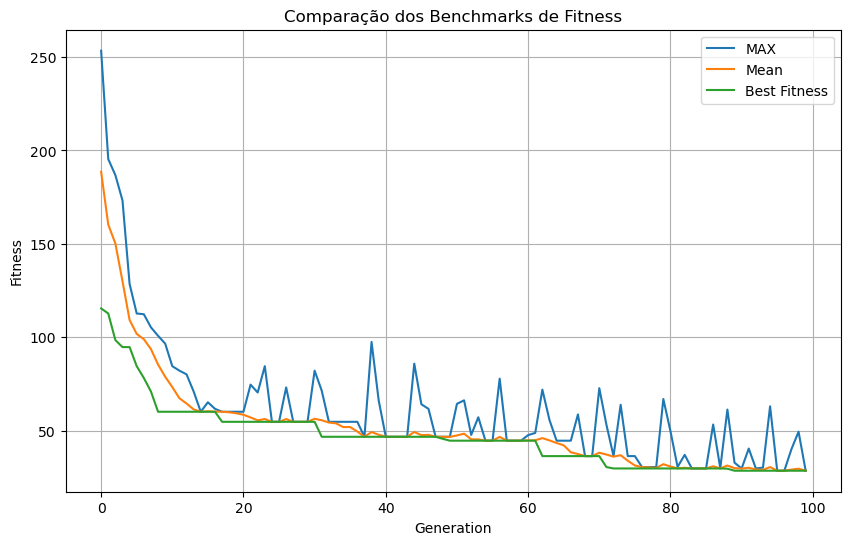

In [73]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt
import json

# Faker for names
fake = Faker(['en_US','pt_BR','it_IT'])

used_names = set()

def generate_unique_name():
    while True:
        name = fake.name()
        if name not in used_names:
            used_names.add(name)
            return name
        
def initIndividual(genes):
    # Generate random genes of desired length
    genes = [random.randint(0,1) for _ in range(10)]
    return creator.Individual(genes=genes, name=generate_unique_name)


# Individual generator that includes unique name assignment
def create_unique_individual():
    individual = toolbox.individual()
    individual.genes = [round(random.uniform(-5,5),2) for _ in range(10)]
    individual.name = generate_unique_name()
    return individual

def repopulate_with_elite(population, elite_individuals, elite_size):
    """
    Substitui os indivíduos menos aptos da população atual pelos melhores indivíduos (elite).
    """
    # Ordena a população atual pelo fitness (do pior para o melhor)
    sorted_population = sorted(population, key=lambda ind: ind.fitness.values, reverse=True)
    
    # Substitui os menos aptos pelos indivíduos elite
    sorted_population[:elite_size] = elite_individuals[:elite_size]
    
    return sorted_population

def remove_and_replace_duplicates(population):
    # Armazena indivíduos únicos baseando-se em nome e valor de fitness.
    unique_combinations = set()
    new_population = []
    
    for ind in population:
        # Avalia o fitness se ainda não foi avaliado.
        if not ind.fitness.valid:
            ind.fitness.values = toolbox.evaluate(ind)
        
        # Cria uma chave única baseando-se no nome e fitness.
        key = (ind.name, ind.fitness.values)
        
        if key not in unique_combinations:
            unique_combinations.add(key)
            new_population.append(ind)
        else:
            # Gera e avalia novos indivíduos até encontrar um único.
            unique_found = False
            while not unique_found:
                new_ind = create_unique_individual()
                new_ind.fitness.values = toolbox.evaluate(new_ind)
                new_key = (new_ind.name, new_ind.fitness.values)
                
                if new_key not in unique_combinations:
                    unique_combinations.add(new_key)
                    new_population.append(new_ind)
                    unique_found = True
                    
    return new_population



def evaluateInd(individual):
    return sum(individual),  

def rastrigin_fitness(individual):
    A = 10
    n = len(individual.genes)
    return A*n + sum(x**2 - A * np.cos(2 * np.pi * x) for x in individual.genes),

def sum_fitness(individual):
    return sum(individual.genes),

# Rastrigin function
def rastrigin(individual):
    A = 10
    n = len(individual)
    return A*n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]),

def evaluate_composite(individual):
    # Avalia o indivíduo usando a função de Rastrigin
    fitness_rastrigin = rastrigin_fitness(individual)[0]
    
    # Avalia o indivíduo usando a função de soma
    fitness_sum = sum_fitness(individual)[0]
    
    # Retorna os resultados como um dicionário para facilitar o acesso
    return {'rastrigin_genes': fitness_rastrigin, 'sum': fitness_sum}

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Constantes
POP_SIZE = 20  # Tamanho da população
CROSSOVER = 0.9  # Probabilidade de crossover
MUTATION = 0.05  # Probabilidade de mutação
GENERATIONS = 100  # Número de gerações


best_population = []
dados = {}

# Assuming you have already created the Fitness and Individual classes with DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
# Adjust attribute generator for float values in the range [-5, 5]
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)


toolbox.register("population", tools.initRepeat, list, create_unique_individual, n=10)


# Evaluation
toolbox.register("evaluate", rastrigin)
toolbox.register("evaluate_rastrigin", rastrigin_fitness)
toolbox.register("evaluate_sum", sum_fitness)

# Genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Elitism
IND_ELITE = tools.HallOfFame(1)




# Statistics
stats = tools.Statistics(key=lambda ind: ind.fitness.values[0])
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

def main():
    pop = toolbox.population(n=POP_SIZE)
   

    # Initialize fitness, generate names, and collect data
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):

        #Funcoes objetivos
        try:
            fitness_results = evaluate_composite(ind)
            ind.rastrigin_fitness = fitness_results['rastrigin_genes']  # Armazenamento personalizado
            ind.sum_fitness = fitness_results['sum']
        except:
            print('\nerro')

        #Dados individuo
        ind.fitness.values = fit
        #print("\n\nDEBUG",ind.name, fit)
        ind.name = fake.name()

    df = pd.DataFrame(columns=["Generation","Best", "Mean", "Minimum", "Maximum"])

    # Evolution
    for gen in range(GENERATIONS):
        dados = {}
        print(f"\n--------- Generation {gen+1} ---------")

        # Imprime a população
        for ind_num, ind in enumerate(pop):
            pass
            #print(f"Indivíduo {ind_num}: {ind.name}, Fitness: {ind.fitness.values}")

        # Elitism (update HOF and select best next generation)
        offspring = toolbox.select(pop, k=len(pop))
        offspring = [toolbox.clone(ind) for ind in offspring]

        # Collect statistics
        stats_data = stats.compile(pop)
        print("\nDados da geração", gen+1, ":", stats_data)
        df.loc[gen] = [gen+1, stats_data["max"], stats_data["avg"], stats_data["min"], stats_data["max"]]

        # Crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate invalid individuals
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            
        
        #Selecionando o conjunto elite
        #pop = tools.selBest(pop + offspring, k=POP_SIZE)
        IND_ELITE.update(offspring)
        print(IND_ELITE)
        print(IND_ELITE.items[0].genes)

        print(f"\nBest individual: {IND_ELITE.items[0].name}, Genes: {IND_ELITE.items[0].genes},Fitness: {IND_ELITE.items[0].fitness.values[0]}, SumEvaluate: {sum(IND_ELITE.items[0].genes)}")
        #df['Name'] = hof.items[0].name  
        dados["Generation"] = gen+1
        dados["Nome"] = IND_ELITE.items[0].name
        dados["Fitness"] = IND_ELITE.items[0].fitness.values[0]
        
        
        try:
            dados["FitnessRastrigin"] = IND_ELITE.items[0].rastrigin_fitness
            dados["FitnessSum"] = IND_ELITE.items[0].sum_fitness

        except:
            print('\n\nerro 2 ')
        best_population.append(dados)
    
        pop[:] = offspring



    # Results and plot
    display(df)
    df.to_excel("./results.xlsx")
    best_population_df = pd.read_json(
        json.dumps(best_population),
        orient="records"

    )
    display(best_population_df)

  
    
    #plot
    plt.figure(figsize=(10, 6))
    plt.plot(df["Best"], label="MAX")
    plt.plot(df["Mean"], label="Mean")
    plt.plot(best_population_df["Fitness"], label="Best Fitness")
    #plt.plot(best_population_df["FitnessRastrigin"], label="Fitness Rastrigin")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.title('Comparação dos Benchmarks de Fitness')
    plt.grid(True)

    plt.show()

if __name__ == "__main__":
    main()


In [74]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt
import json

# Faker for names
fake = Faker(['en_US','pt_BR','it_IT'])

used_names = set()

def generate_unique_name():
    while True:
        name = fake.name()
        if name not in used_names:
            used_names.add(name)
            return name
        
def initIndividual(genes):
    # Generate random genes of desired length
    genes = [random.randint(0,1) for _ in range(10)]
    return creator.Individual(genes=genes, name=generate_unique_name)


# Individual generator that includes unique name assignment
def create_unique_individual():
    individual = toolbox.individual()
    individual.genes = [round(random.uniform(-5,5),2) for _ in range(10)]
    individual.name = generate_unique_name()
    return individual

def repopulate_with_elite(population, elite_individuals, elite_size):
    """
    Substitui os indivíduos menos aptos da população atual pelos melhores indivíduos (elite).
    """
    # Ordena a população atual pelo fitness (do pior para o melhor)
    sorted_population = sorted(population, key=lambda ind: ind.fitness.values, reverse=True)
    
    # Substitui os menos aptos pelos indivíduos elite
    sorted_population[:elite_size] = elite_individuals[:elite_size]
    
    return sorted_population

def remove_and_replace_duplicates(population):
    # Armazena indivíduos únicos baseando-se em nome e valor de fitness.
    unique_combinations = set()
    new_population = []
    
    for ind in population:
        # Avalia o fitness se ainda não foi avaliado.
        if not ind.fitness.valid:
            ind.fitness.values = toolbox.evaluate(ind)
        
        # Cria uma chave única baseando-se no nome e fitness.
        key = (ind.name, ind.fitness.values)
        
        if key not in unique_combinations:
            unique_combinations.add(key)
            new_population.append(ind)
        else:
            # Gera e avalia novos indivíduos até encontrar um único.
            unique_found = False
            while not unique_found:
                new_ind = create_unique_individual()
                new_ind.fitness.values = toolbox.evaluate(new_ind)
                new_key = (new_ind.name, new_ind.fitness.values)
                
                if new_key not in unique_combinations:
                    unique_combinations.add(new_key)
                    new_population.append(new_ind)
                    unique_found = True
                    
    return new_population



def evaluateInd(individual):
    return sum(individual),  

def rastrigin_fitness(individual):
    A = 10
    n = len(individual.genes)
    return A*n + sum(x**2 - A * np.cos(2 * np.pi * x) for x in individual.genes),

def sum_fitness(individual):
    return sum(individual.genes),

# Rastrigin function
def rastrigin(individual):
    A = 10
    n = len(individual)
    return A*n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]),

def evaluate_composite(individual):
    # Avalia o indivíduo usando a função de Rastrigin
    fitness_rastrigin = rastrigin_fitness(individual)[0]
    
    # Avalia o indivíduo usando a função de soma
    fitness_sum = sum_fitness(individual)[0]
    
    # Retorna os resultados como um dicionário para facilitar o acesso
    return {'rastrigin_genes': fitness_rastrigin, 'sum': fitness_sum}

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Constantes
POP_SIZE = 20  # Tamanho da população
CROSSOVER = 0.9  # Probabilidade de crossover
MUTATION = 0.05  # Probabilidade de mutação
GENERATIONS = 100  # Número de gerações


best_population = []
dados = {}

# Assuming you have already created the Fitness and Individual classes with DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
# Adjust attribute generator for float values in the range [-5, 5]
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)


toolbox.register("population", tools.initRepeat, list, create_unique_individual, n=10)


# Evaluation
toolbox.register("evaluate", rastrigin)
toolbox.register("evaluate_rastrigin", rastrigin_fitness)
toolbox.register("evaluate_sum", sum_fitness)

# Genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Elitism
IND_ELITE = tools.HallOfFame(1)
toolbox.register("elite", tools.selBest, k=1)




# Statistics
stats = tools.Statistics(key=lambda ind: ind.fitness.values[0])
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

def main():
    pop = toolbox.population(n=POP_SIZE)
   

    # Initialize fitness, generate names, and collect data
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):

        #Funcoes objetivos
        try:
            fitness_results = evaluate_composite(ind)
            ind.rastrigin_fitness = fitness_results['rastrigin_genes']  # Armazenamento personalizado
            ind.sum_fitness = fitness_results['sum']
        except:
            print('\nerro')

        #Dados individuo
        ind.fitness.values = fit
        #print("\n\nDEBUG",ind.name, fit)
        ind.name = fake.name()

    df = pd.DataFrame(columns=["Generation","Best", "Mean", "Minimum", "Maximum"])

    # Evolution
    for gen in range(GENERATIONS):
        dados = {}
        print(f"\n--------- Generation {gen+1} ---------")

        # Imprime a população
        for ind_num, ind in enumerate(pop):
            pass
            print(f"Indivíduo {ind_num}: {ind.name}, Fitness: {ind.fitness.values}")

        # Elitism (update HOF and select best next generation)
        offspring = toolbox.select(pop, k=len(pop))
        offspring = [toolbox.clone(ind) for ind in offspring]

        # Collect statistics
        stats_data = stats.compile(pop)
        print("\nDados da geração", gen+1, ":", stats_data)
        df.loc[gen] = [gen+1, stats_data["max"], stats_data["avg"], stats_data["min"], stats_data["max"]]

        # Crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate invalid individuals
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            
        
        #Selecionando o conjunto elite
        offspring[1] = toolbox.elite(offspring)
        print( offspring[1])



   
        try:
            IND_ELITE.update(offspring)
            print(f"\nBest individual: {IND_ELITE.items[0].name}, Genes: {IND_ELITE.items[0].genes},Fitness: {IND_ELITE.items[0].fitness.values[0]}, SumEvaluate: {sum(IND_ELITE.items[0].genes)}")
            dados["Generation"] = gen+1
            dados["Nome"] = IND_ELITE.items[0].name
            dados["Fitness"] = IND_ELITE.items[0].fitness.values[0]
            dados["FitnessRastrigin"] = IND_ELITE.items[0].rastrigin_fitness
            dados["FitnessSum"] = IND_ELITE.items[0].sum_fitness

        except:
            print('\n\nerro 2 ')
        best_population.append(dados)
    
        pop[:] = offspring



    # Results and plot
    display(df)
    df.to_excel("./results.xlsx")
    best_population_df = pd.read_json(
        json.dumps(best_population),
        orient="records"

    )
    display(best_population_df)

  
    
    #plot
    plt.figure(figsize=(10, 6))
    plt.plot(df["Best"], label="MAX")
    plt.plot(df["Mean"], label="Mean")
    plt.plot(best_population_df["Fitness"], label="Best Fitness")
    #plt.plot(best_population_df["FitnessRastrigin"], label="Fitness Rastrigin")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.title('Comparação dos Benchmarks de Fitness')
    plt.grid(True)

    plt.show()

if __name__ == "__main__":
    main()



--------- Generation 1 ---------
Indivíduo 0: Sra. Helena da Mata, Fitness: (179.74833717625177,)
Indivíduo 1: Eloah Vieira, Fitness: (217.5152735390446,)
Indivíduo 2: Kimberly Rivera, Fitness: (166.35813465599335,)
Indivíduo 3: Vito Squarcione, Fitness: (142.1306770697649,)
Indivíduo 4: Eduardo da Costa, Fitness: (126.9832510369797,)
Indivíduo 5: Stella Bombieri, Fitness: (219.77690004846585,)
Indivíduo 6: Ippazio Sanudo, Fitness: (123.56187600690987,)
Indivíduo 7: Girolamo Amato, Fitness: (127.01452069168101,)
Indivíduo 8: Graziella Pavone, Fitness: (216.18612900812246,)
Indivíduo 9: Enrico Ferreira, Fitness: (206.37282314829815,)
Indivíduo 10: Brenda Novaes, Fitness: (221.4743409641472,)
Indivíduo 11: Sr. Vitor Gabriel Dias, Fitness: (239.71254908037443,)
Indivíduo 12: Tina Fantozzi-Nievo, Fitness: (213.51373235275628,)
Indivíduo 13: Amber Gates, Fitness: (180.5100219253058,)
Indivíduo 14: Amadeo Scialpi, Fitness: (243.66743441870813,)
Indivíduo 15: Sig.ra Natalia Barsanti, Fitness

/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


AttributeError: 'list' object has no attribute 'name'

## SOLID

In [2]:
from deap import base, creator, tools
import random
from faker import Faker

# Configuração inicial do Faker e DEAP
fake = Faker()
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

used_names = set()  # Conjunto para armazenar nomes já utilizados

def generate_unique_name():
    """Gera um nome único usando Faker."""
    while True:
        name = fake.name()
        if name not in used_names:
            used_names.add(name)
            return name

# Modifica a criação de indivíduos para incluir nomes únicos
def create_individual():
    individual = toolbox.individual()
    individual.name = generate_unique_name()  # Adiciona um nome único a cada indivíduo
    return individual

# Atualiza a função de registro para usar a nova função de criação de indivíduos
toolbox.register("individual_unique_name", create_individual)

# Exemplo de geração de uma população com nomes únicos
population = [toolbox.individual_unique_name() for _ in range(20)]
for ind in population:
    print(ind.name)

print(used_names)

John Patterson
Kristi Brown
Nicole Roman
Anita Knapp
Michael Mann
Doris Swanson
David Spears
Jordan Dennis
Christopher Young
Valerie Moore
Mario Valentine
John Henderson
Dana Carter
Jasmine Mitchell
Katherine Sherman
Alexander Parker
Erica Mejia
Mikayla Cain
Christopher Cowan
Kelsey Kent
{'Christopher Cowan', 'Katherine Sherman', 'Erica Mejia', 'Mario Valentine', 'Valerie Moore', 'Alexander Parker', 'David Spears', 'Nicole Roman', 'Jasmine Mitchell', 'Kristi Brown', 'Jordan Dennis', 'Michael Mann', 'Anita Knapp', 'Christopher Young', 'Kelsey Kent', 'John Patterson', 'Dana Carter', 'Mikayla Cain', 'John Henderson', 'Doris Swanson'}


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
